In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/content/shops.csv')

In [ ]:
data.head()

,food,price,store,origin
0,chocolate,100.30,supermarket,russia
1,chocolate,55.57,minimarket,russia
2,chocolate,268.62,minimarket,import
3,chocolate,196.81,supermarket,import
4,bread,10.91,minimarket,russia


In [ ]:
data.shape

(20, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   food    20 non-null     object 
 1   price   20 non-null     float64
 2   store   20 non-null     object 
 3   origin  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes


### Зависимая переменная это ценна, потому что мы ее иследуем.

### Независимые переменные это:
- ### Тип магазина (store)
- ### Страна (origin)
- ### Тип продукта (food)

### Так как цена товаров может зависеть от типа магазина, страны происхождения и категории товара.



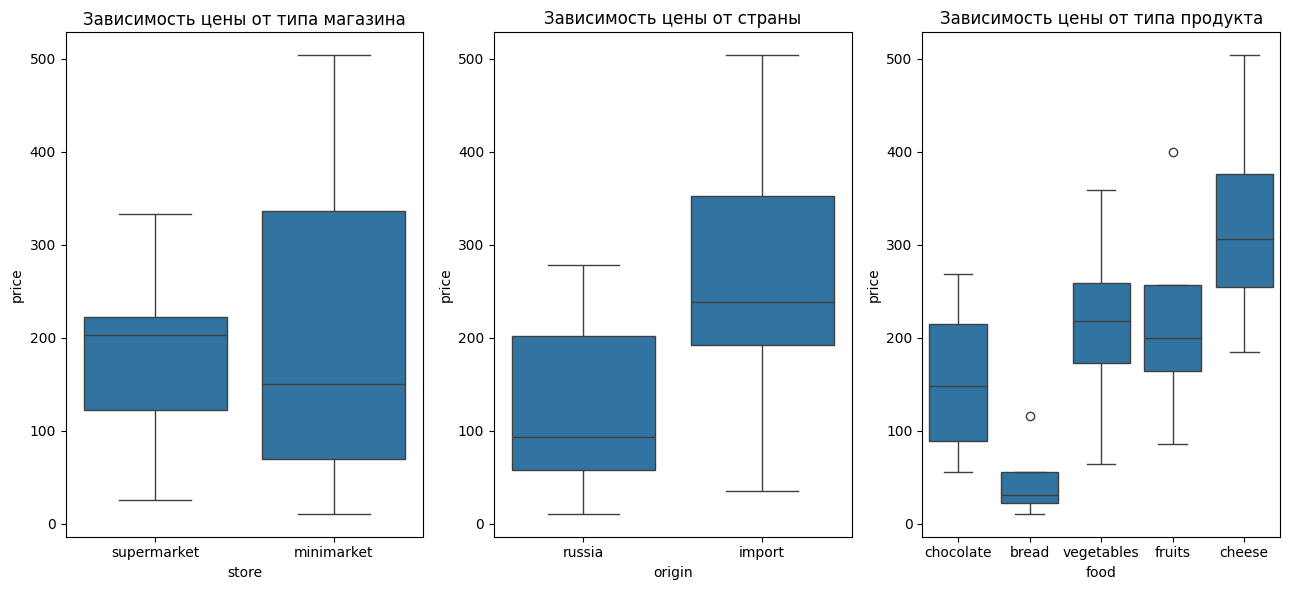

In [ ]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='store', y='price', data = data)
plt.title('Зависимость цены от типа магазина')

plt.subplot(1, 3, 2)
sns.boxplot(x='origin', y='price', data = data)
plt.title('Зависимость цены от страны')

plt.subplot(1, 3, 3)
sns.boxplot(x='food', y='price', data = data)
plt.title('Зависимость цены от типа продукта')

plt.tight_layout()
plt.show()

In [ ]:
group_store = data.groupby('store')['price'].apply(list)
group_origin = data.groupby('origin')['price'].apply(list)
group_food = data.groupby('food')['price'].apply(list)

print(group_store)
print(group_origin)
print(group_food)

store
minimarket     [55.57, 268.62, 10.91, 64.93, 116.23, 359.0, 8...
supermarket    [100.3, 196.81, 25.84, 35.44, 226.39, 209.15, ...
Name: price, dtype: object
origin
import    [268.62, 196.81, 35.44, 116.23, 209.15, 359.0,...
russia    [100.3, 55.57, 10.91, 25.84, 64.93, 226.39, 85...
Name: price, dtype: object
food
bread           [10.91, 25.84, 35.44, 116.23]
cheese        [184.56, 278.86, 333.21, 504.0]
chocolate      [100.3, 55.57, 268.62, 196.81]
fruits        [85.84, 191.07, 208.59, 400.17]
vegetables     [64.93, 226.39, 209.15, 359.0]
Name: price, dtype: object


### Проверка нормальности распределения цен в разных магазинах  

Применим критерий Шапиро-Уилка для проверки гипотезы о нормальности распределения цен в каждой группе магазинов.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Цены в магазине распределены нормально.  
- **H₁ (альтернативная гипотеза):** Цены в магазине не подчиняются нормальному распределению.  

Если p > 0.05, мы не отвергаем нулевую гипотезу, значит, цены могут быть нормально распределены.  
Если p ≤ 0.05, отвергаем H₀ в пользу H₁, значит, данные не распределены нормально.


In [ ]:
from scipy.stats import shapiro

alpha = 0.05

for store, prices in group_store.items():
    stat, p = shapiro(prices)
    print(stat, p)

    if p > alpha:
        print('Признак распределён нормально')
    else:
        print('Признак не распределён нормально')

0.9119603980685513 0.29473021084640305
Признак распределён нормально
0.9253359830226551 0.40361273494915
Признак распределён нормально


### Проверка нормальности распределения цен по странам происхождения  

Применяем критерий Шапиро-Уилка для проверки гипотезы о нормальности распределения цен в каждой группе, основанной на стране происхождения товара.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Цены товаров в каждой стране происхождения распределены нормально.  
- **H₁ (альтернативная гипотеза):** Цены товаров в каждой стране происхождения не подчиняются нормальному распределению.  

Если p > 0.05, мы не отвергаем H₀, что указывает на возможную нормальность распределения.  
Если p ≤ 0.05, отвергаем H₀ в пользу H₁, это значит что распределение цен ненормально.


In [ ]:
alpha = 0.05
for origin, prices in group_origin.items():
    stat, p = shapiro(prices)
    print(stat, p)

    if p > alpha:
        print('Признак распределён нормально')
    else:
        print('Признак не распределён нормально')


0.9850644912954005 0.9864793505130488
Признак распределён нормально
0.9203949844704954 0.3602610065311407
Признак распределён нормально


### Проверка нормальности распределения цен по типу продукта  

Применяем критерий Шапиро-Уилка для оценки нормальности распределения цен в каждой группе, основанной на категории продукта.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Цены для каждого типа продукта распределены нормально.  
- **H₁ (альтернативная гипотеза):** Цены для каждого типа продукта не подчиняются нормальному распределению.  

Если p > 0.05, мы не отвергаем H₀, что может свидетельствовать о нормальности распределения.  
Если p ≤ 0.05, отвергаем H₀ в пользу H₁, что означает, что цены распределены ненормально.


In [ ]:
alpha = 0.05
for food, prices in group_food.items():
    stat, p = shapiro(prices)
    print(stat, p)

    if p > alpha:
        print('Признак распределён нормально')
    else:
        print('Признак не распределён нормально')


0.8197216894349117 0.14255000875144203
Признак распределён нормально
0.9682779324377635 0.8307919609578589
Признак распределён нормально
0.9586891558198813 0.770659545256112
Признак распределён нормально
0.9322503998367382 0.6076881279492681
Признак распределён нормально
0.9675825458236845 0.8264607309625542
Признак распределён нормально


### Проверка однородности дисперсий цен в разных магазинах  

Применяем тест Бартлетта для проверки гипотезы о равенстве дисперсий цен в группах, основанных на магазине.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Дисперсии цен во всех магазинах равны.  
- **H₁ (альтернативная гипотеза):** Дисперсии цен в разных магазинах различаются.  

Если p > 0.05, мы не отвергаем H₀, что означает, что дисперсии можно считать равными.  
Если p ≤ 0.05, отвергаем H₀, что свидетельствует о значительных различиях в дисперсиях между магазинами.


In [ ]:
from scipy.stats import bartlett

stat, p = bartlett(*group_store)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H₀)')
else:
    print('Дисперсии различаются (отвергаем H₀)')


2.3226976328888895 0.1274987430028709
Дисперсии равны (не отвергаем H₀)


### Проверка однородности дисперсий цен по странам происхождения  

Используем тест Бартлетта для проверки равенства дисперсий цен среди различных стран происхождения товаров.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Дисперсии цен в разных странах равны.  
- **H₁ (альтернативная гипотеза):** Дисперсии цен различаются в зависимости от страны происхождения.  

Если p > 0.05, мы не отвергаем H₀, что означает, что разброс цен в странах можно считать одинаковым.  
Если p ≤ 0.05, отвергаем H₀, что указывает на статистически значимые различия в дисперсиях.


In [ ]:
stat, p = bartlett(*group_origin)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H₀)')
else:
    print('Дисперсии различаются (отвергаем H₀)')

1.393880374956271 0.23775088873414438
Дисперсии равны (не отвергаем H₀)


### Проверка однородности дисперсий цен по типу продукта  

Применяем тест Бартлетта для оценки равенства дисперсий цен среди различных категорий продуктов.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Дисперсии цен для разных типов продуктов равны.  
- **H₁ (альтернативная гипотеза):** Дисперсии цен различаются в зависимости от категории продукта.  

Если p > 0.05, мы не отвергаем H₀, что означает, что разброс цен для разных продуктов примерно одинаков.  
Если p ≤ 0.05, отвергаем H₀, что указывает на статистически значимые различия в дисперсиях между категориями продуктов


In [ ]:
stat, p = bartlett(*group_food)

print(stat, p)

alpha = 0.05
if p > alpha:
    print('Дисперсии равны (не отвергаем H₀)')
else:
    print('Дисперсии различаются (отвергаем H₀)')

2.878138644422655 0.5784213012140524
Дисперсии равны (не отвергаем H₀)


### Проверка влияния типа магазина на цену

Применяем однофакторный дисперсионный анализ для проверки влияния магазина на цену товаров.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Средние цены в разных магазинах не различаются, тип магазина не влияет на цену.  
- **H₁ (альтернативная гипотеза):** Средние цены в разных магазинах различаются, тип магазина влияет на цену.  

Если p > 0.05, мы не отвергаем H₀, что означает отсутствие статистически значимого влияния типа магазина на цену.  
Если p ≤ 0.05, отвергаем H₀, что указывает на влияние типа магазина на цену.


In [ ]:
from scipy.stats import f_oneway

alpha = 0.05
stat, p = f_oneway(*group_store)

print(stat, p)

if p > alpha:
    print("Тип магазина не влияет на цену (не отвергаем H₀)")
else:
    print("Тип магазина влияет на цену (отвергаем H₀)")


0.1551431529821821 0.6982950712933294
Тип магазина не влияет на цену (не отвергаем H₀)


In [ ]:
alpha = 0.05

stat, p = f_oneway(*group_origin)

print(stat, p)

if p > alpha:
    print("Страна-производитель не влияет на цену (не отвергаем H₀)")
else:
    print("Страна-производитель влияет на цену (отвергаем H₀)")


6.649892032631297 0.01892578326891915
Страна-производитель влияет на цену (отвергаем H₀)


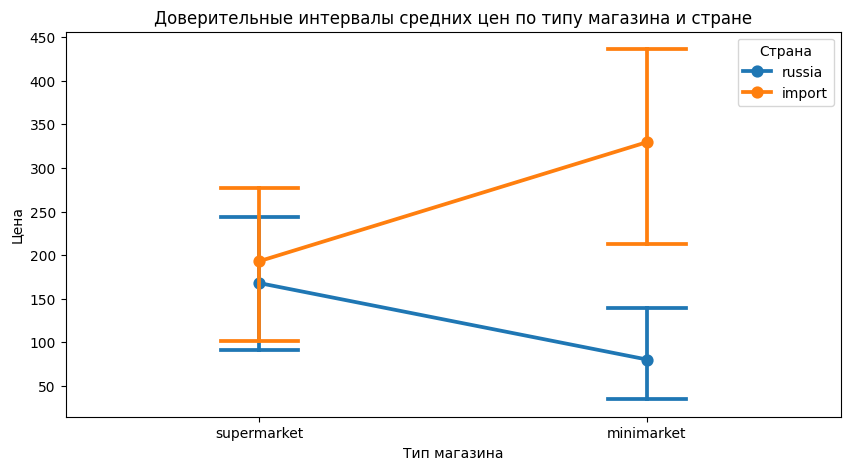

In [ ]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=data, x='store', y='price', hue='origin', capsize=0.2)
plt.title("Доверительные интервалы средних цен по типу магазина и стране")
plt.xlabel("Тип магазина")
plt.ylabel("Цена")
plt.legend(title="Страна")
plt.show()


### Двухфакторный дисперсионный анализ

Применяем двухфакторный дисперсионный анализ для изучения влияния типа магазина и страны происхождения на цену товаров, а также их возможного взаимодействия.  

**Модель включает в себя:**  
- **C(store)** – влияние магазина на цену.  
- **C(origin)** – влияние страны происхождения на цену.  
- **C(store):C(origin)** – взаимодействие между магазином и страной происхождения.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Фактор (магазин, страна происхождения или их взаимодействие) не оказывает влияния на цену.  
- **H₁ (альтернативная гипотеза):** Фактор оказывает значимое влияние на цену.  

В таблице:  
- Если p для фактора > 0.05 влияние этого фактора на цену не является статистически значимым.  
- Если p ≤ 0.05 фактор оказывает значительное влияние на цену.  


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(store) + C(origin) + C(store):C(origin)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                           sum_sq    df         F    PR(>F)
C(store)              2980.949445   1.0  0.252394  0.622238
C(origin)            94106.852405   1.0  7.967925  0.012252
C(store):C(origin)   62777.133005   1.0  5.315272  0.034867
Residual            188971.368040  16.0       NaN       NaN


In [ ]:
from scipy.stats import f_oneway

stat, p = f_oneway(*group_food)
print(stat, p)

alpha = 0.05
if p < alpha:
    print("Тип продукции влияет на ценообразование (отвергаем H₀)")
else:
    print("Тип продукции не влияет на ценообразование (не отвергаем H₀)")


3.3977807766676675 0.03617523023287855
Тип продукции влияет на ценообразование (отвергаем H₀)


###  Критерий Тьюки для множественных сравнений  

Мы используем тест Тьюки для попарного сравнения средних цен среди различных категорий продуктов.  

**Постановка гипотез:**  
- **H₀ (нулевая гипотеза):** Средние цены между парами категорий продуктов не различаются.  
- **H₁ (альтернативная гипотеза):** Средние цены между парами категорий продуктов различаются.  

**Результаты:**  
- Если p > 0.05 нет значимых различий между парами категорий.  
- Если p ≤ 0.05 средние цены между парами категорий продуктов различаются на значимом уровне.  

Результаты теста Тьюки помогут определить, какие именно категории продуктов имеют статистически значимые различия в ценах.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'], groups=data['food'], alpha=0.05)

print(tukey.summary())


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
    bread     cheese  278.0525 0.0204   36.8694 519.2356   True
    bread  chocolate    108.22 0.6454 -132.9631 349.4031  False
    bread     fruits  174.3125 0.2209  -66.8706 415.4956  False
    bread vegetables  167.7625 0.2513  -73.4206 408.9456  False
   cheese  chocolate -169.8325 0.2414 -411.0156  71.3506  False
   cheese     fruits   -103.74 0.6789 -344.9231 137.4431  False
   cheese vegetables   -110.29 0.6297 -351.4731 130.8931  False
chocolate     fruits   66.0925 0.9117 -175.0906 307.2756  False
chocolate vegetables   59.5425 0.9375 -181.6406 300.7256  False
   fruits vegetables     -6.55    1.0 -247.7331 234.6331  False
---------------------------------------------------------------
